In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from ipywidgets import interact

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.datasets import load_boston

In [7]:
import seaborn as sns

### 輸入房價資料

In [8]:
boston_dataset=load_boston()

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [10]:
boston=pd.DataFrame(boston_dataset.data,
                   columns=boston_dataset.feature_names)

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston['MEDV']=boston_dataset.target

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 原始數據

In [14]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,
                                         test_size=0.2,
                                         random_state=0)

In [16]:
# step1. 開啟函數學習機
model=LinearRegression()

In [17]:
# step2.訓練
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# step3.預測
y_predict=model.predict(x_test)

In [19]:
sns.set()

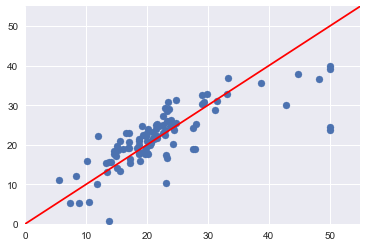

In [20]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

In [21]:
# 取相關係數
corrlation_matrix=boston.corr().round(2)

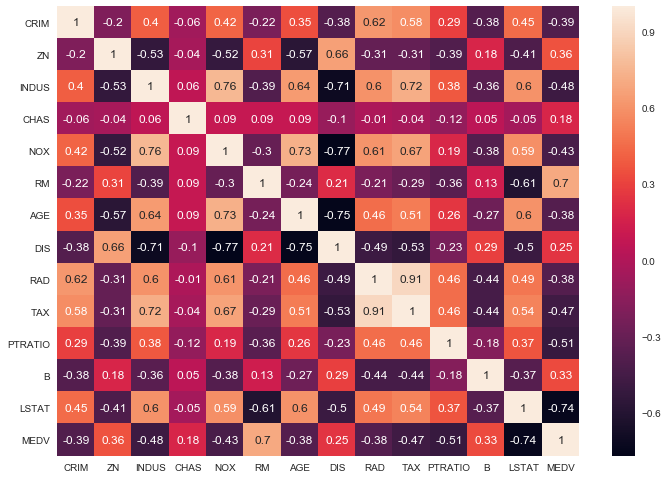

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrlation_matrix,annot=True)

### 減少features

In [23]:
#把相關係數趨近零與負向的剃除(因為前者與房價無干，後者與房價反向變動)
boston.drop(["CHAS", "DIS", "ZN","B"], axis=1, inplace=True)

In [24]:
X = boston.drop("MEDV", axis=1)
Y = boston.MEDV

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size =0.2,
                                                   random_state =0)

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
y_predict_NEW = model.predict(x_test)

In [29]:
y_predict_NEW

array([ 24.94479675,  22.39065326,  28.36558891,  11.05565936,
        22.5340011 ,  19.59588719,  19.66879651,  21.92067527,
        16.33830435,  21.29876883,   8.68073785,  17.8014825 ,
        17.55517827,   3.66623695,  39.46426217,  33.17691691,
        22.18254713,  37.39456582,  29.12222107,  22.01789704,
        25.17574591,  25.98478497,  18.28776989,  27.7742664 ,
        22.57368222,  10.18040491,  18.14157211,  20.64144413,
        35.6259954 ,  20.05134324,  17.66812276,  18.02781056,
        24.51438644,  25.42794549,  28.00289212,  16.71412353,
        10.01917259,  20.76082686,  18.72611381,  14.9939161 ,
        27.54952845,  20.8680789 ,  23.63888457,  14.94069281,
        26.16359217,  27.0695058 ,  23.34076544,  22.74397039,
         9.95324014,  23.13933254,  22.31618694,  14.57893798,
        24.19406605,  34.51178803,  14.42831002,  22.72548832,
        21.24137215,  19.97408233,  16.48465618,  20.3878618 ,
        21.7577918 ,  21.80664469,  32.39870515,  29.51

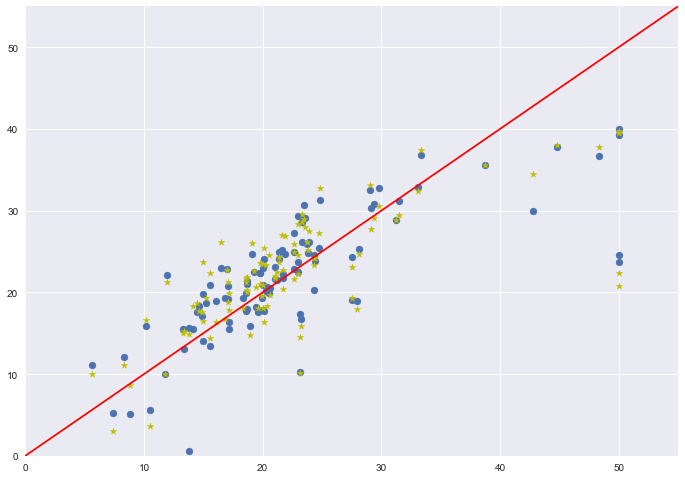

In [30]:
plt.scatter(y_test, y_predict)
plt.scatter(y_test, y_predict_NEW, marker = "*", c="y")
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55], [0,55], "r")

In [39]:
from sklearn import preprocessing
import numpy as np

In [40]:
X = preprocessing.scale(X)

In [43]:
preprocessing.scale(boston, axis=0, with_mean=True, with_std=True, copy=True)

array([[-0.41771335, -1.2879095 , -0.14421743, ..., -1.45900038,
        -1.0755623 ,  0.15968566],
       [-0.41526932, -0.59338101, -0.74026221, ..., -0.30309415,
        -0.49243937, -0.10152429],
       [-0.41527165, -0.59338101, -0.74026221, ..., -0.30309415,
        -1.2087274 ,  1.32424667],
       ..., 
       [-0.41137448,  0.11573841,  0.15812412, ...,  1.17646583,
        -0.98304761,  0.14880191],
       [-0.40568883,  0.11573841,  0.15812412, ...,  1.17646583,
        -0.86530163, -0.0579893 ],
       [-0.41292893,  0.11573841,  0.15812412, ...,  1.17646583,
        -0.66905833, -1.15724782]])